In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
new_data = pd.read_csv('Att2CleanData.csv')

In [3]:
x_new_data = new_data.drop(['GoodLoan'], axis=1)
y_new_data = new_data['GoodLoan']

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(x_new_data, y_new_data, test_size=0.33, random_state=42)

In [5]:
# Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],


In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))

0.973666176296


In [6]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[ 0.97272528  0.97344712  0.97413218  0.97352887  0.9735106 ]


In [12]:
y_score = clf.decision_function(X_test)
ave_prec = average_precision_score(y_test, y_score)
print(ave_prec)

0.985630282156


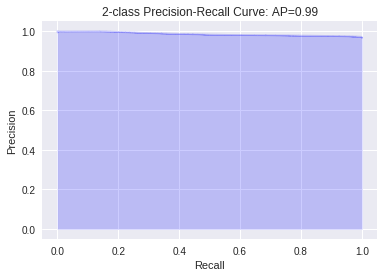

In [18]:
prec, rec, _ = precision_recall_curve(y_test, y_score)
plt.step(rec, prec, color='b', alpha=0.2, where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(ave_prec))
plt.show()

In [10]:
param_grid = {'C':[0.001, 0.1, 1, 10, 100]}

clf = GridSearchCV(LogisticRegression(), param_grid)
clf.fit(X_train, y_train)

print("Best Values: \n")
print(clf.best_score_)
print()
print("Best Params:")
print(clf.best_params_)
print()

Best Values: 

0.97352180627
Best Params:
{'C': 0.1}



In [9]:
clf = LogisticRegression(C=0.1)
clf.fit(X_train, y_train)
acc_score = accuracy_score(clf.predict(X_test), y_test)
print("The accuracy score Value of C=0.1:", acc_score)

The accuracy score Value of C=0.1: 0.972451024043


In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



In [19]:
y_true, y_pred = y_test, clf.predict(X_test)

In [20]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.61      0.76     18839
        1.0       0.97      1.00      0.99    250681

avg / total       0.97      0.97      0.97    269520

